In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [183]:
from pandas.plotting import scatter_matrix

In [2]:
pd.set_option("display.max_columns",999)

In [3]:
housing2=pd.read_csv(r"/Users/tiko/Documents/Machine_Learning_Ames_Housing_Kaggle/Ames_Real_Estate_Data.csv")
housing1=pd.read_csv(r"/Users/tiko/Documents/Machine_Learning_Ames_Housing_Kaggle/Ames_HousePrice.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
housing1.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [5]:
# check to see year sold unique years
housing1["YrSold"].value_counts()


2007    600
2009    585
2008    564
2006    516
2010    315
Name: YrSold, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

target = housing1["SalePrice"]
features = housing1.drop("SalePrice", axis = 1)


In [32]:
features.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
target

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2575    121000
2576    139600
2577    145000
2578    217500
2579    215000
Name: SalePrice, Length: 2580, dtype: int64

In [9]:
housing1[housing1['PoolArea']>0]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
65,66,528164060,2470,615000,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
487,488,532476050,2646,260000,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,1974,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,Gd,Fa,CBlock,Gd,TA,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,495,0,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,1974.0,RFn,2.0,550.0,TA,TA,Y,641,100,0,0,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal
595,596,527356020,2784,250000,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,TA,Y,SBrkr,1392,1392,0,1.0,0.0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2.0,564.0,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal
1179,180,906200230,1822,228500,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,TA,NaN,NaN,0,4,2007,WD,Normal
1417,418,527377030,1309,181000,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663.0,LwQ,377.0,0.0,1040.0,GasA,Fa,Y,SBrkr,1309,0,0,1.0,0.0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2.0,484.0,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1668,669,909475230,2726,315000,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,0.0,0.0,2,1,2,1,Gd,6,Typ,1,Gd,Attchd,1986.0,Fin,2.0,691.0,Gd,Gd,Y,216,64,169,0,0,228,Ex,NaN,NaN,0,8,2007,WD,Normal
2008,192,923202220,2034,130000,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,0.0,0.0,1,0,2,1,TA,9,Min1,0,NaN,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,TA,GdPrv,NaN,0,6,2007,WD,Normal
2424,608,914475020,1118,171000,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522.0,Unf,0.0,574.0,1096.0,GasA,TA,Y,SBrkr,1118,0,0,1.0,0.0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1.0,358.0,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal
2473,657,535353050,1647,153000,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,16

In [10]:
newdf = housing1[housing1["Fireplaces"]==1]
newdf['FireplaceQu'].value_counts()

Gd    519
TA    481
Fa     60
Po     43
Ex     29
Name: FireplaceQu, dtype: int64

In [11]:
newdf.isna().sum()

Unnamed: 0       0
PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 82, dtype: int64

In [12]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22213 entries, 0 to 22212
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MapRefNo      22213 non-null  int64  
 1   GeoRefNo      22213 non-null  int64  
 2   Tier          22213 non-null  int64  
 3   Range         22213 non-null  int64  
 4   Prop_Addr     22193 non-null  object 
 5   ZngCdPr       22107 non-null  object 
 6   ZngCdSc       26 non-null     object 
 7   ZngOLPr       1970 non-null   object 
 8   ZngOLSc       153 non-null    object 
 9   ClassPr_S     22213 non-null  object 
 10  ClassSc_S     22213 non-null  object 
 11  Legal_Pr      22213 non-null  object 
 12  SchD_S        22213 non-null  int64  
 13  TxD_S         22213 non-null  int64  
 14  MA_Ownr1      22213 non-null  object 
 15  MA_Ownr2      2876 non-null   object 
 16  MA_Line1      22199 non-null  object 
 17  MA_Line2      0 non-null      float64
 18  MA_City       22199 non-nu

In [13]:
housing1[]

SyntaxError: invalid syntax (3658008008.py, line 1)

In [ ]:
housing2.head()

<AxesSubplot:>

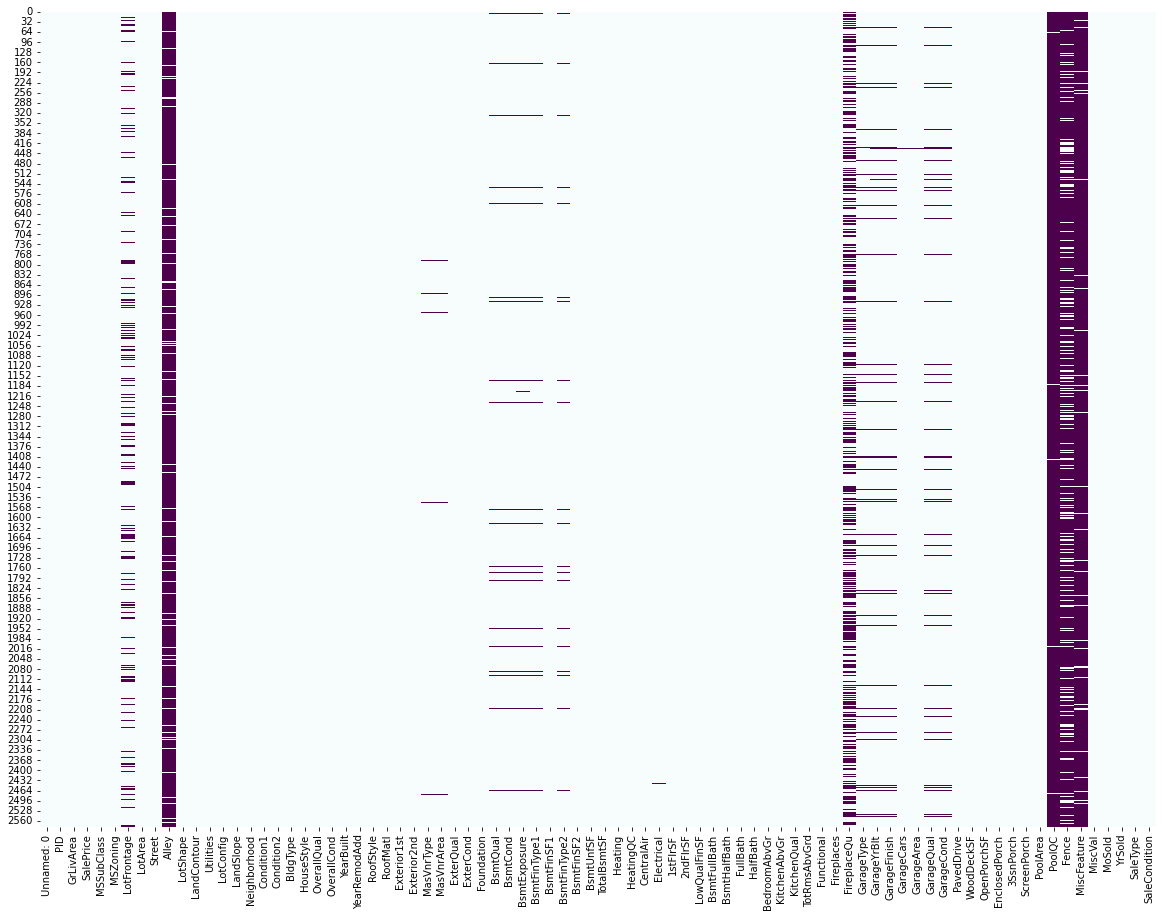

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(housing1.isna(),cmap="BuPu",cbar=False)

In [15]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2580 non-null   int64  
 1   PID            2580 non-null   int64  
 2   GrLivArea      2580 non-null   int64  
 3   SalePrice      2580 non-null   int64  
 4   MSSubClass     2580 non-null   int64  
 5   MSZoning       2580 non-null   object 
 6   LotFrontage    2118 non-null   float64
 7   LotArea        2580 non-null   int64  
 8   Street         2580 non-null   object 
 9   Alley          168 non-null    object 
 10  LotShape       2580 non-null   object 
 11  LandContour    2580 non-null   object 
 12  Utilities      2580 non-null   object 
 13  LotConfig      2580 non-null   object 
 14  LandSlope      2580 non-null   object 
 15  Neighborhood   2580 non-null   object 
 16  Condition1     2580 non-null   object 
 17  Condition2     2580 non-null   object 
 18  BldgType

<AxesSubplot:>

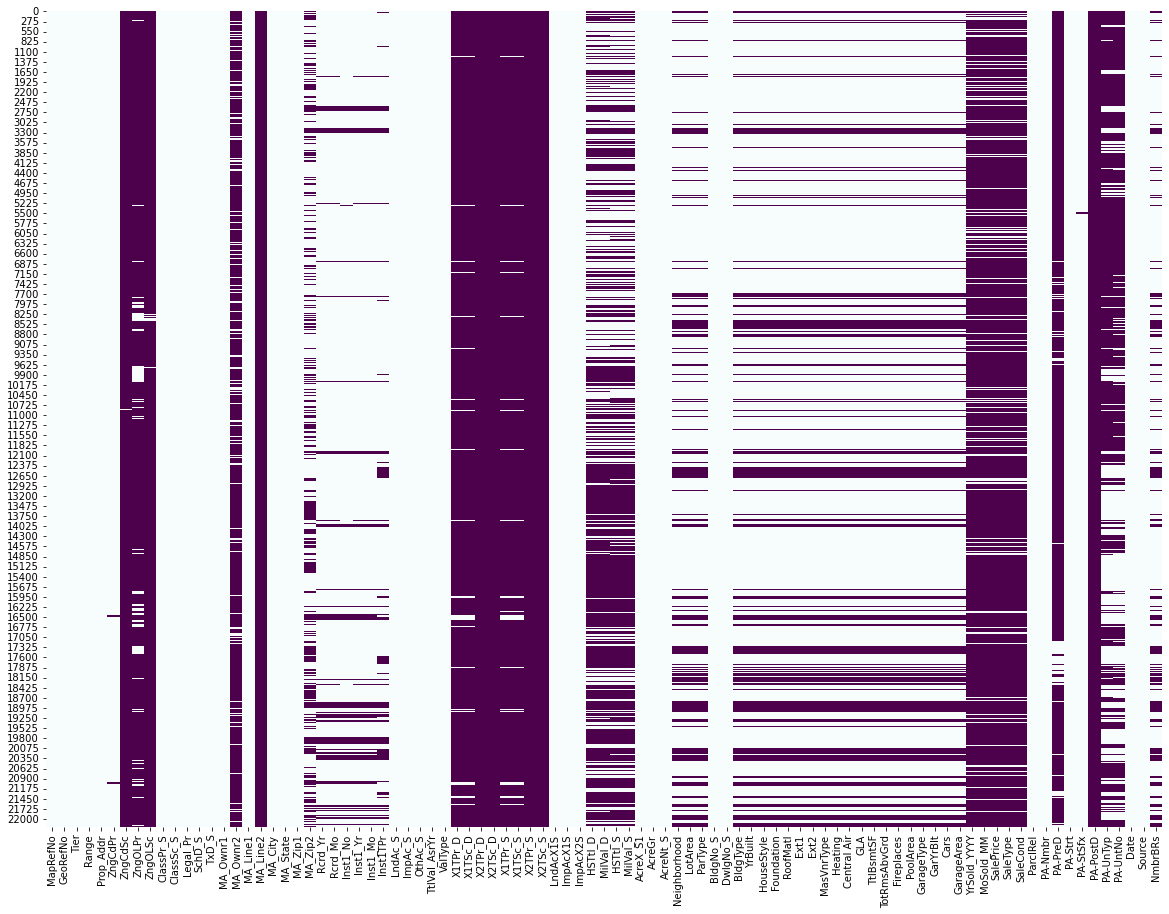

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(housing2.isna(),cmap="BuPu",cbar=False)



#Impute Na Values for this data.

In [17]:
housing1.isna().sum().sum()

12254

In [18]:
cols = list(housing1.columns)

missing = []
for col in cols:
    na = col, housing1[col].isna().sum() 
    missing.append(na)


In [19]:
missing1 = pd.DataFrame(missing,columns=["Column Name","NA Count"]).set_index("Column Name")

In [20]:
missing1

,NA Count
Column Name,
Unnamed: 0,0
PID,0
GrLivArea,0
SalePrice,0
MSSubClass,0
...,...
MiscVal,0
MoSold,0
YrSold,0


In [21]:
housing1["FireplaceQu"].value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [22]:
cols2 = list(housing2.columns)

missing2 = []
for col in cols2:
    na = col, housing2[col].isna().sum() 
    missing2.append(na)

In [23]:
missing2 = pd.DataFrame(missing2,columns=["Column Name","NA Count"]).set_index("Column Name")

In [24]:
missing2

,NA Count
Column Name,
MapRefNo,0
GeoRefNo,0
Tier,0
Range,0
Prop_Addr,20
...,...
PA-UnTyp,14468
PA-UntNo,14096
Date,0


In [25]:
housing1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2580 non-null   int64  
 1   PID            2580 non-null   int64  
 2   GrLivArea      2580 non-null   int64  
 3   SalePrice      2580 non-null   int64  
 4   MSSubClass     2580 non-null   int64  
 5   MSZoning       2580 non-null   object 
 6   LotFrontage    2118 non-null   float64
 7   LotArea        2580 non-null   int64  
 8   Street         2580 non-null   object 
 9   Alley          168 non-null    object 
 10  LotShape       2580 non-null   object 
 11  LandContour    2580 non-null   object 
 12  Utilities      2580 non-null   object 
 13  LotConfig      2580 non-null   object 
 14  LandSlope      2580 non-null   object 
 15  Neighborhood   2580 non-null   object 
 16  Condition1     2580 non-null   object 
 17  Condition2     2580 non-null   object 
 18  BldgType

In [26]:
housing1.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,436.480233,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,258.829647,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,1.000000,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,215.750000,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,430.500000,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,645.250000,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1000.000000,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

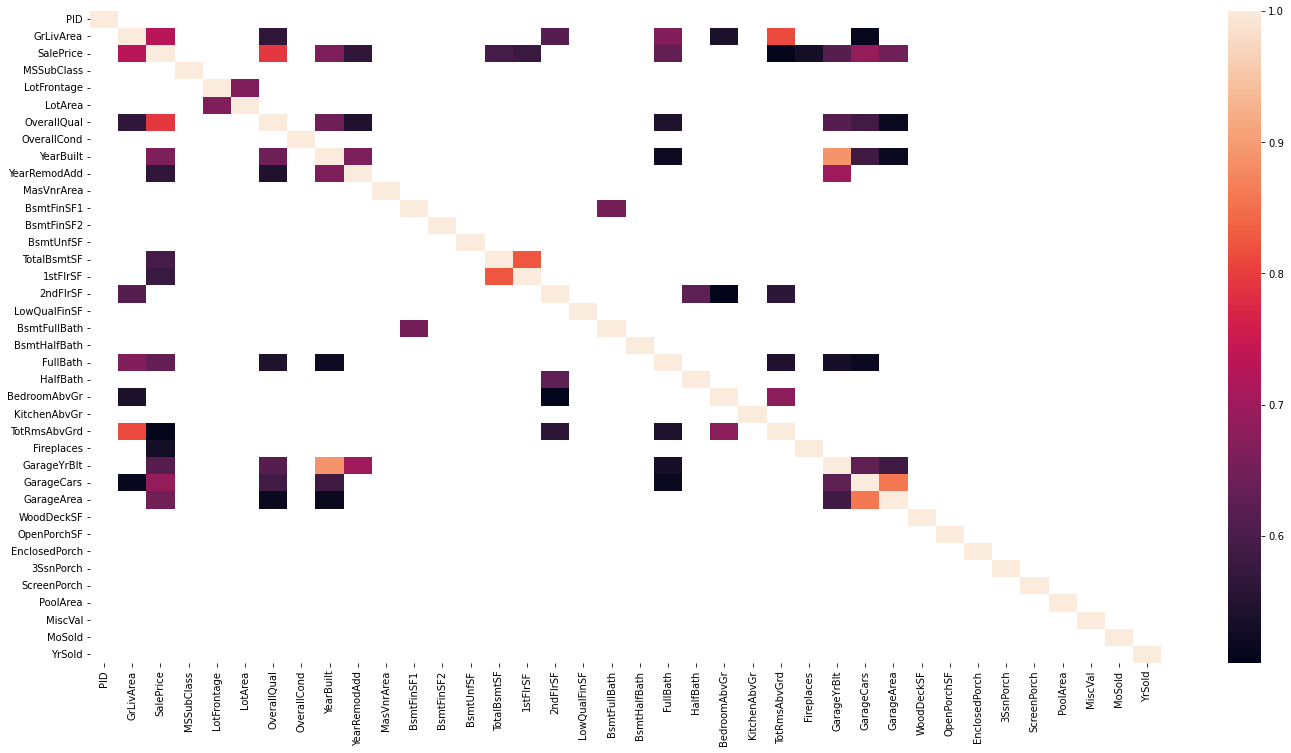

In [27]:
plt.figure(figsize  = (24,12))
num_val=housing1.select_dtypes(["int64","float64"])
num_val.drop("Unnamed: 0",axis = 1, inplace = True)
cor = num_val.corr(method = "spearman")
# sns.heatmap(cor, cmap = "coolwarm", )
v = cor[(cor>0.50)].dropna(axis = 1,how = 'all')


sns.heatmap(v)

In [48]:
# Exploring Multicolinearity with VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [110]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 1 to 2579
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            1988 non-null   int64  
 1   GrLivArea      1988 non-null   int64  
 2   MSSubClass     1988 non-null   int64  
 3   LotFrontage    1988 non-null   float64
 4   LotArea        1988 non-null   int64  
 5   OverallQual    1988 non-null   int64  
 6   OverallCond    1988 non-null   int64  
 7   YearBuilt      1988 non-null   int64  
 8   YearRemodAdd   1988 non-null   int64  
 9   MasVnrArea     1988 non-null   float64
 10  BsmtFinSF1     1988 non-null   float64
 11  BsmtFinSF2     1988 non-null   float64
 12  BsmtUnfSF      1988 non-null   float64
 13  TotalBsmtSF    1988 non-null   float64
 14  1stFlrSF       1988 non-null   int64  
 15  2ndFlrSF       1988 non-null   int64  
 16  LowQualFinSF   1988 non-null   int64  
 17  BsmtFullBath   1988 non-null   float64
 18  BsmtHalf

In [126]:
#Creating a function to calculate VIF (Variance Inflation Factor to determine multicolinearity levels in the 
#numeric features of our dataset)

def calc_vif(dataset):
    viff = pd.DataFrame()
    viff["Features"] = dataset.columns
    viff["VIF_Score"] = [vif(dataset.values, i) for i in range(dataset.shape[1])] #taking the sqrt to improve
    #readibility
    return viff[viff["VIF_Score"]>30]


calc_vif(num_features)


#columns with High VIF Score:

# 7.  YearBuilt	154.563646
# 8	YearRemodAdd	147.719689
# 10	BsmtFinSF1	inf
# 11	BsmtFinSF2	inf
# 12	BsmtUnfSF	inf
# 13	TotalBsmtSF	inf
# 14	1stFlrSF	inf
# 25	GarageYrBlt	163.295516
# 36	YrSold	157.303896


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF_Score
1,GrLivArea,inf
5,OverallQual,6.415259e+01
6,OverallCond,4.655950e+01
7,YearBuilt,2.388992e+04
8,YearRemodAdd,2.182111e+04
10,BsmtFinSF1,inf
11,BsmtFinSF2,inf
12,BsmtUnfSF,inf
13,TotalBsmtSF,inf
14,1stFlrSF,inf


In [91]:
# attempting to see all numeric columns in our features dataframe
pd.set_option("display.max_rows",80) 
#print(pd.DataFrame(features.dtypes))

num_features = features.select_dtypes(include = np.number) # selecting all numeric features for EDA and Analysis on multicolinearity

num_features.isna().sum() # dropping NA's outright with no imputation to conduct preliminary EDA on VIF scores

num_features.dropna(axis=0, how='any', inplace=True)
num_features.isna().sum() # checking to see if all na's have been removed 







/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


PID              0
GrLivArea        0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [92]:
num_features

,PID,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,905476230,1049,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
2,911128020,1001,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
3,535377150,1039,70,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
4,534177230,1665,60,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
5,908128060,1922,85,64.0,7301,7,5,2003,2003,500.0,0.0,0.0,0.0,0.0,495,1427,0,0.0,0.0,3,0,4,1,7,1,2003.0,2.0,672.0,0,0,177,0,0,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,905377050,1242,20,84.0,17808,4,5,1946,1950,0.0,0.0,0.0,484.0,484.0,1242,0,0,0.0,0.0,1,0,2,1,4,0,1946.0,1.0,336.0,0,0,0,0,0,0,0,7,2007
2573,534430050,816,30,60.0,8550,6,8,1934,1950,0.0,574.0,0.0,242.0,816.0,816,0,0,1.0,0.0,1,0,2,1,4,1,1949.0,1.0,240.0,228,0,40,0,0,0,0,7,2006
2574,908128100,1724,60,62.0,7162,7,5,2003,2004,190.0,0.0,0.0,796.0,796.0,806,918,0,0.0,0.0,2,1,3,1,8,1,2003.0,2.0,616.0,168,57,0,0,0,0,0,5,2006
2577,909275030,2002,90,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007


In [103]:
num_feat_target = num_features.copy()
num_feat_target["target"] = target
num_feat_target

,PID,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
1,905476230,1049,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,139500
2,911128020,1001,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,124900
3,535377150,1039,70,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,114000
4,534177230,1665,60,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,227000
5,908128060,1922,85,64.0,7301,7,5,2003,2003,500.0,0.0,0.0,0.0,0.0,495,1427,0,0.0,0.0,3,0,4,1,7,1,2003.0,2.0,672.0,0,0,177,0,0,0,0,7,2009,198500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,905377050,1242,20,84.0,17808,4,5,1946,1950,0.0,0.0,0.0,484.0,484.0,1242,0,0,0.0,0.0,1,0,2,1,4,0,1946.0,1.0,336.0,0,0,0,0,0,0,0,7,2007,109900
2573,534430050,816,30,60.0,8550,6,8,1934,1950,0.0,574.0,0.0,242.0,816.0,816,0,0,1.0,0.0,1,0,2,1,4,1,1949.0,1.0,240.0,228,0,40,0,0,0,0,7,2006,129800
2574,908128100,1724,60,62.0,7162,7,5,2003,2004,190.0,0.0,0.0,796.0,796.0,806,918,0,0.0,0.0,2,1,3,1,8,1,2003.0,2.0,616.0,168,57,0,0,0,0,0,5,2006,196500
2577,909275030,2002,90,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007,145000


In [101]:
target

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2575    121000
2576    139600
2577    145000
2578    217500
2579    215000
Name: SalePrice, Length: 2580, dtype: int64

In [104]:
print(num_feat_target.corr())

                    PID  GrLivArea  MSSubClass  LotFrontage   LotArea  \
PID            1.000000  -0.106209   -0.043814    -0.082320  0.024533   
GrLivArea     -0.106209   1.000000    0.078613     0.336554  0.289408   
MSSubClass    -0.043814   0.078613    1.000000    -0.445212 -0.255370   
LotFrontage   -0.082320   0.336554   -0.445212     1.000000  0.457739   
LotArea        0.024533   0.289408   -0.255370     0.457739  1.000000   
OverallQual   -0.262547   0.571326    0.070816     0.168728  0.118252   
OverallCond    0.157880  -0.144153   -0.085067    -0.047054 -0.055087   
YearBuilt     -0.347624   0.230542    0.060352     0.088301  0.033161   
YearRemodAdd  -0.130799   0.304934    0.043894     0.058478  0.027028   
MasVnrArea    -0.262385   0.406869    0.027643     0.199632  0.107556   
BsmtFinSF1    -0.122608   0.185390   -0.080796     0.178852  0.175557   
BsmtFinSF2    -0.016607  -0.045832   -0.064796     0.052132  0.101408   
BsmtUnfSF     -0.078509   0.253940   -0.112605     

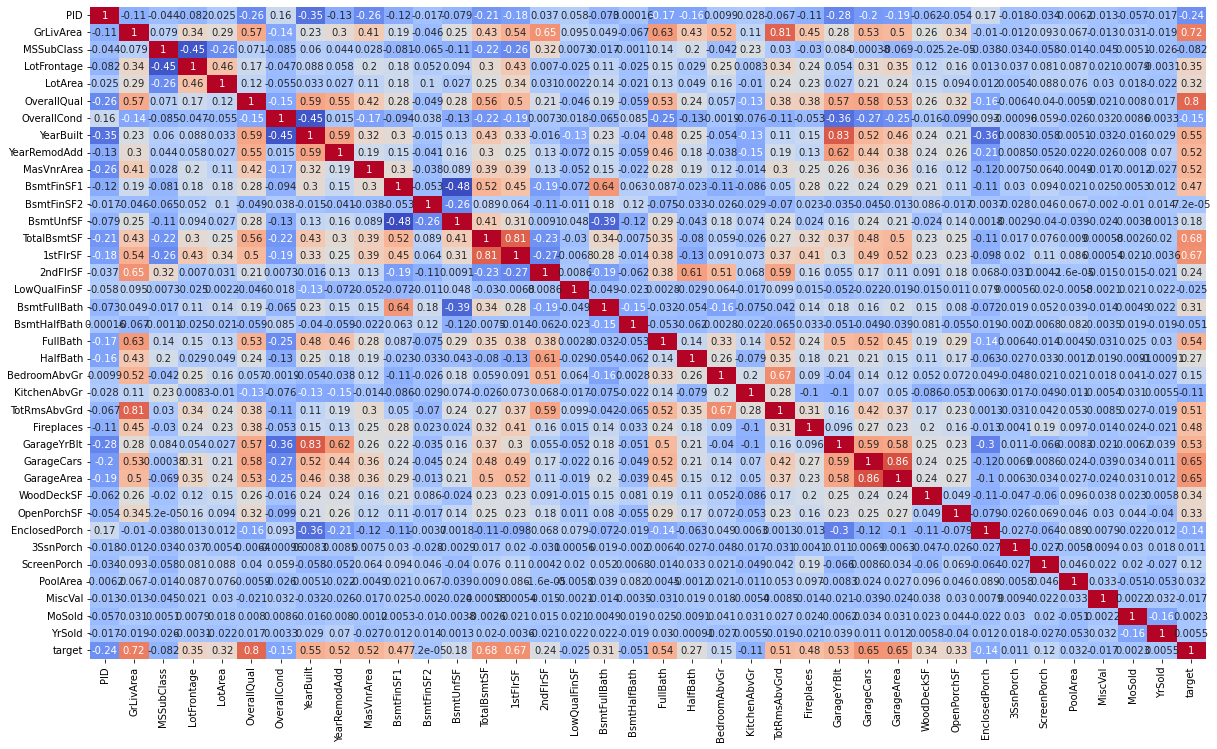

In [125]:
plt.figure(figsize=(20,12));
sns.heatmap(num_feat_target.corr(), cmap="coolwarm", cbar=False, annot=True);
#columns with High VIF Score:

# 7.  YearBuilt	154.563646
# 8	YearRemodAdd	147.719689
# 10	BsmtFinSF1	inf
# 11	BsmtFinSF2	inf
# 12	BsmtUnfSF	inf
# 13	TotalBsmtSF	inf
# 14	1stFlrSF	inf
# 25	GarageYrBlt	163.295516
# 36	YrSold	157.303896

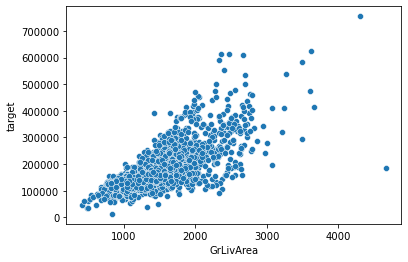

In [172]:
sns.scatterplot(data = num_feat_target, x = "GrLivArea", y = "target");

AttributeError: 'str' object has no attribute 'max'

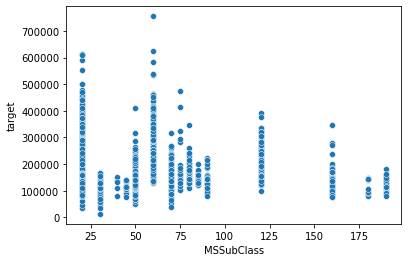

In [224]:
def scatter_target(x):
    chart = sns.scatterplot(data = num_feat_target, x = x, y = "target",);
    chart.set(xlim=(0, x.max()))
    return chart
scatter_target("MSSubClass");        

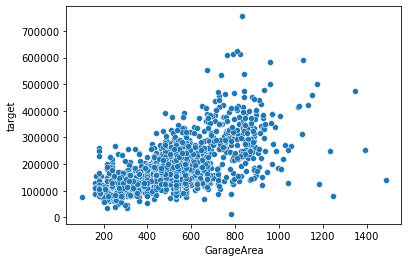

In [217]:
scatter_target("GarageArea"); 

In [222]:
num_feat_target["MSSubClass"].max()

190

In [226]:
scatter_target(LotArea); 

NameError: name 'LotArea' is not defined

ValueError: Could not interpret value `PID` for parameter `x`

<AxesSubplot:xlabel='SalePrice'>

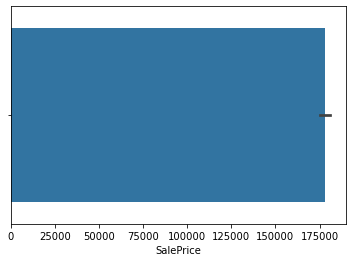

In [131]:
# Checking distribution of the target variable

sns.barplot(x = target)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

<Figure size 2880x1584 with 0 Axes>

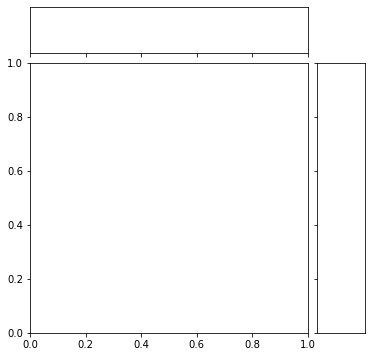

In [190]:
plt.figure(figsize=(40,22))
sns.jointplot(num_feat_target[1:])

In [185]:
features

,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,905402060,1733,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,909275030,2002,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,907192040,1842,60,RL,NaN,8826,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,

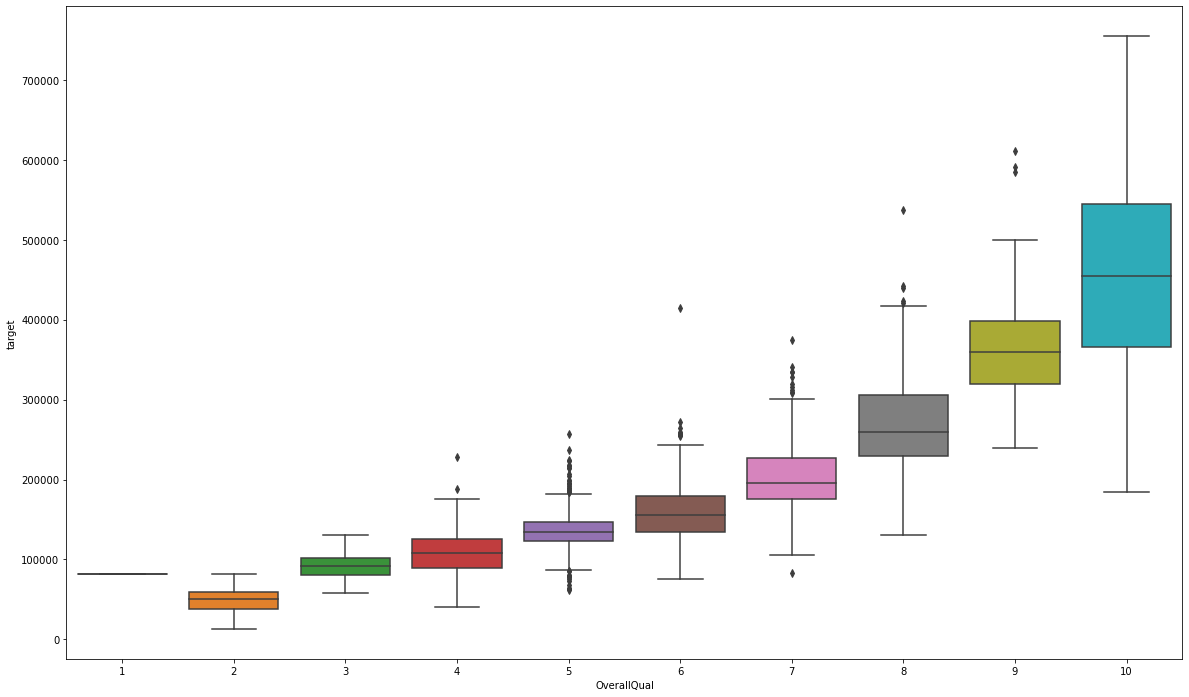

In [168]:
def box_plot(data,x,hue = None, y = 'target', orient = 'v'):
    plt.figure(figsize=(20,12));
    return sns.boxplot(data = data, x = x, hue = hue, y = y, orient = orient);

box_plot(data = num_feat_target,x = "OverallQual");

<AxesSubplot:xlabel='GarageCars', ylabel='target'>

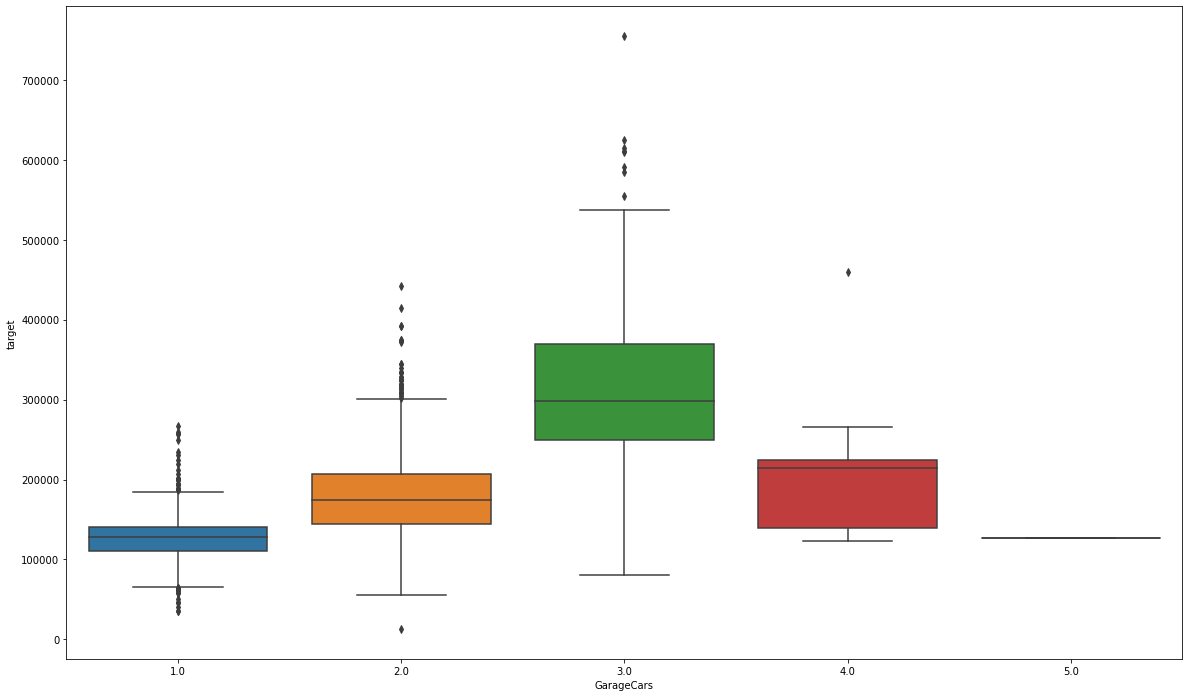

In [161]:
box_plot(num_feat_target, "GarageCars")

In [ ]:
box_plot(num_feat_target, )

In [136]:
target.describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [146]:
num_feat_target

,PID,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
1,905476230,1049,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,139500
2,911128020,1001,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,124900
3,535377150,1039,70,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,114000
4,534177230,1665,60,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,227000
5,908128060,1922,85,64.0,7301,7,5,2003,2003,500.0,0.0,0.0,0.0,0.0,495,1427,0,0.0,0.0,3,0,4,1,7,1,2003.0,2.0,672.0,0,0,177,0,0,0,0,7,2009,198500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,905377050,1242,20,84.0,17808,4,5,1946,1950,0.0,0.0,0.0,484.0,484.0,1242,0,0,0.0,0.0,1,0,2,1,4,0,1946.0,1.0,336.0,0,0,0,0,0,0,0,7,2007,109900
2573,534430050,816,30,60.0,8550,6,8,1934,1950,0.0,574.0,0.0,242.0,816.0,816,0,0,1.0,0.0,1,0,2,1,4,1,1949.0,1.0,240.0,228,0,40,0,0,0,0,7,2006,129800
2574,908128100,1724,60,62.0,7162,7,5,2003,2004,190.0,0.0,0.0,796.0,796.0,806,918,0,0.0,0.0,2,1,3,1,8,1,2003.0,2.0,616.0,168,57,0,0,0,0,0,5,2006,196500
2577,909275030,2002,90,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007,145000


In [28]:
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [29]:
impute = IterativeImputer(max_iter=10, random_state=0)

In [ ]:

impute.fit()